In [123]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [124]:
#A Primer in Numerics: Ordinary Differential Equations

#choose step size 
dt = 0.001
#choose interval
T = 10

#set up parameters
w = 4*math.pi #natural frequency
z = 0.06     #damping coefficient
A = np.array([[0,1],
             [-w**2, -2*z*w]]) #spring-mass-damp system

x0 = np.array([2,0]) #initial conditions

#define grid
t_init, t_fin = (0,10)
t = np.arange(t_init, t_fin + dt, dt)


In [125]:
#forward Euler integrator
x = np.zeros((2,len(t)))
x[:,0] = x0
for i in range(0, len(t) - 1):
    x[:,i+1] = (np.eye(2) + dt*A) @ x[:,i] 


In [126]:
#backward Euler
xB = np.zeros((2,len(t)))
xB[:,0] = x0
for i in range(0, len(t) - 1):
    xB[:,i+1] = np.linalg.inv(np.eye(2) - dt*A) @ xB[:,i] 

In [127]:
#Runge-Kutta
def ODE(t,x):
    return A @ x

solve = solve_ivp(ODE, (t_init,t_fin), x0, t_eval=t)
xRK=solve.y

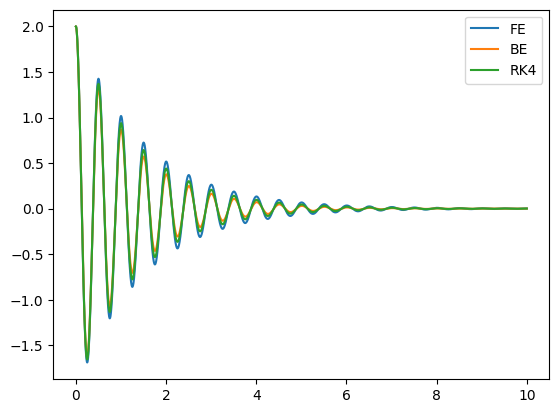

In [128]:
plt.plot(t,x[0,:])
plt.plot(t,xB[0,:])
plt.plot(t,xRK[0,:])
plt.legend(['FE','BE','RK4'])